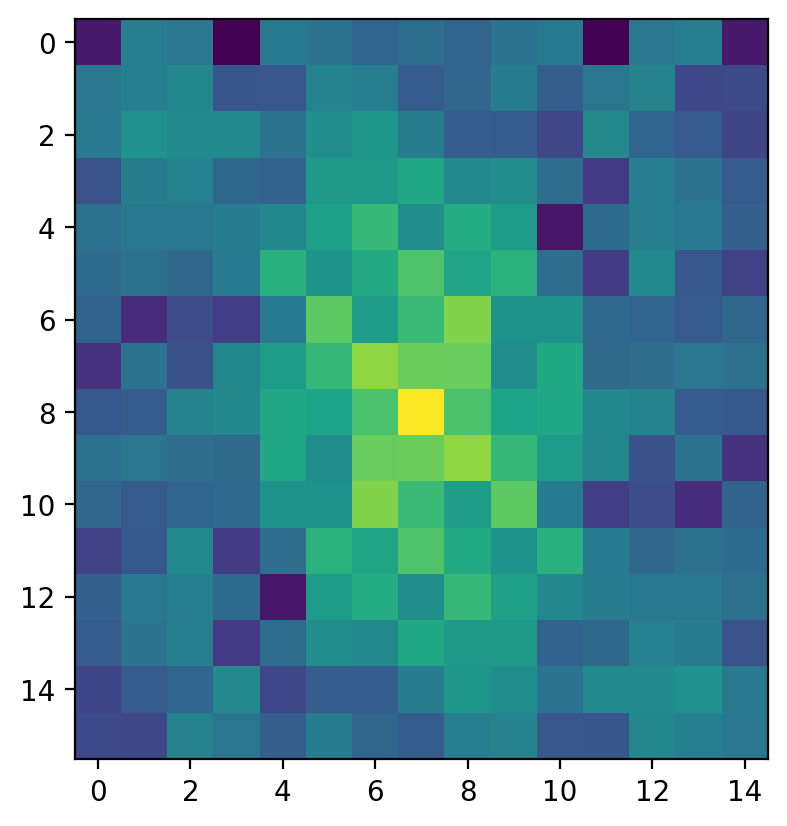

In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
from torch import nn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from dataloader import FFT_transform_ST,FFT_transform_PM
from time import time
import os

In [2]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]

    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [3]:
#I'm using the dataloading code that you uploaded
entries = os.listdir('Data/')

#Importing training data
train_data=[k for k in entries if 'train' in k]

X_title_train=[]
flat_data_train=[]
flat_data_train_raw=[]
X_data_train = []
X_data_train_phase=[]
X_data_train_raw = []
flat_data_train_phase=[]
for entry in train_data:
    name=entry
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))
            X_data_train_raw.append(mat_r)
            
            #here we apply the FFT transform
            mag_val,phase_val = FFT_transform_PM(mat_r)
            magphs = FFT_transform_ST(mat_r)
            #break
            X_data_train.append(magphs)
            X_data_train_phase.append(phase_val)
            X_title_train.append(name)
            flat_data_train.append(magphs.flatten())
            flat_data_train_phase.append(phase_val.flatten())
            flat_data_train_raw.append(mat_r.flatten())
    #X_data_train.append(mag_val)
    #X_data.append (image)

#Importing test data
test_data=[k for k in entries if 'test' in k]
#print(test_data)

#test set
X_title_test=[]
X_data_test = []
flat_data_test=[]
X_data_test_phase=[]
X_data_test_raw=[]
flat_data_test_phase=[]
flat_data_test_raw=[]

#Validation set
X_title_val=[]
X_data_val = []
flat_data_val=[]
X_data_val_phase=[]
X_data_val_raw=[]
flat_data_val_phase=[]
flat_data_val_raw=[]

for entry in test_data:
    name=entry
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        counter = 0
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))
            mag_val,phase_val = FFT_transform_PM(mat_r)
            magphs = FFT_transform_ST(mat_r)
            
            if counter < 40:
                X_data_val_raw.append(mat_r)
                X_data_val.append(magphs)
                X_data_val_phase.append(phase_val)
                X_title_val.append(name)
                flat_data_val.append(magphs.flatten())
                flat_data_val_phase.append(phase_val.flatten())
                flat_data_val_raw.append(mat_r.flatten())
            else:
                X_data_test_raw.append(mat_r)
                X_data_test.append(magphs)
                X_data_test_phase.append(phase_val)
                X_title_test.append(name)
                flat_data_test.append(magphs.flatten())
                flat_data_test_phase.append(phase_val.flatten())
                flat_data_test_raw.append(mat_r.flatten())
            
            counter += 1

#             mag_val,phase_val = FFT_transform_PM(mat_r)
            #break
#             X_data_test.append(mag_val)
#             X_data_test_phase.append(phase_val)
#             X_title_test.append(name)
#             flat_data_test.append(mag_val.flatten())
#             flat_data_test_phase.append(phase_val.flatten())
#             flat_data_test_raw.append(mat_r.flatten())
    #X_data.append (image)

print("Data size metrics:")
print("Training set: ", )
print("        RAW: ", len(X_data_train_raw))
print("        Magnitude: ", len(X_data_train))
print("        Phase: ", len(X_data_train_phase))
print()
print("Validation set: ", )
print("        RAW: ", len(X_data_val_raw))
print("        Magnitude: ", len(X_data_val))
print("        Phase: ", len(X_data_val_phase))
print()
print("Testing set: ", )
print("        RAW: ", len(X_data_test_raw))
print("        Magnitude: ", len(X_data_test))
print("        Phase: ", len(X_data_test_phase))

#calculate the labels of the data
res_train=[]
res_train = [sub.replace('.txt', '') for sub in X_title_train]
res_train = [sub.replace('train_', '') for sub in res_train]
res_train = [eval(i) for i in res_train]
X_train_lable=res_train
res_val=[]
res_val = [sub.replace('.txt', '') for sub in X_title_val]
res_val = [sub.replace('test_', '') for sub in res_val]
res_val = [eval(i) for i in res_val]
X_val_lable=res_val
res_test=[]
res_test = [sub.replace('.txt', '') for sub in X_title_test]
res_test = [sub.replace('test_', '') for sub in res_test]
res_test = [eval(i) for i in res_test]
X_test_lable=res_test


x_train=flat_data_train
x_train_raw=flat_data_train_raw
x_train_phase= flat_data_train_phase # added the phase values 
#here I just convert nan to numbers but we might want to look deeper into where the nan values are coming from in the first place
x_train=np.nan_to_num(x_train)
x_train_raw=np.nan_to_num(x_train_raw)
x_train_phase = np.nan_to_num(x_train_phase)
#print(len(flat_data_train))
y_train_temp = X_train_lable
y_train = [float(temp_y) for temp_y in y_train_temp] #Converting to Float; for softmax at output (not mandatory)

x_val=flat_data_val
x_val_raw=flat_data_val_raw
x_val_phase = flat_data_val_phase
x_val=np.nan_to_num(x_val)
x_val_phase= np.nan_to_num(x_val_phase)
y_val_temp = X_val_lable
y_val = [float(temp_yy) for temp_yy in y_val_temp] #Converting to Float; for softmax at output (not mandatory)

x_test=flat_data_test
x_test_raw=flat_data_test_raw
x_test_phase = flat_data_test_phase
x_test=np.nan_to_num(x_test)
x_test_phase= np.nan_to_num(x_test_phase)
y_test_temp = X_test_lable
y_test = [float(temp_yy) for temp_yy in y_test_temp] #Converting to Float; for softmax at output (not mandatory)

#One hot encoding the class labels
enc = OneHotEncoder(handle_unknown='ignore')
enc_y_train = np.array(y_train)
enc_y_train = enc_y_train.reshape(-1, 1)

enc_y_val = np.array(y_val)
enc_y_val = enc_y_val.reshape(-1, 1)

enc_y_test = np.array(y_test)
enc_y_test = enc_y_test.reshape(-1, 1)

enc.fit(enc_y_train)
# print("Categories:", enc.categories_)
n_y_train = enc.transform(enc_y_train).toarray()
n_y_val = enc.transform(enc_y_val).toarray()
n_y_test = enc.transform(enc_y_test).toarray()

Data size metrics:
Training set: 
        RAW:  1000
        Magnitude:  1000
        Phase:  1000

Validation set: 
        RAW:  400
        Magnitude:  400
        Phase:  400

Testing set: 
        RAW:  600
        Magnitude:  600
        Phase:  600


In [4]:
# Layer details for the neural network
input_size = 480
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)     

Sequential(
  (0): Linear(in_features=480, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [7]:
criterion = nn.NLLLoss()
# images, labels = next(iter(trainloader))
# images = images.view(images.shape[0], -1)
batch_size = 100
batch_x, batch_y = x_train, y_train
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(np.array(batch_y))
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

logps = model(batch_x_tensor)
loss = criterion(logps, batch_y_tensor)

In [8]:
print(batch_x.shape)

(1000, 480)


In [9]:
print(batch_y_tensor)

tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [10]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 3.5610e-03,  4.1389e-03,  3.0428e-03,  ..., -6.5391e-06,
          3.2853e-04,  1.9456e-04],
        [ 3.1238e-02,  2.5228e-02,  2.9863e-02,  ...,  2.0151e-03,
         -7.0696e-04,  1.0996e-03],
        [ 3.5742e-02,  3.5909e-02,  3.8608e-02,  ..., -3.3972e-03,
         -5.2257e-04, -1.4238e-03],
        ...,
        [ 4.6582e-02,  5.2231e-02,  5.8753e-02,  ..., -2.2298e-03,
         -1.6776e-04, -1.9578e-04],
        [ 7.9243e-03,  1.0097e-02,  1.3137e-02,  ..., -3.0920e-05,
         -1.3916e-04,  6.2591e-04],
        [ 3.9697e-02,  4.3060e-02,  4.8751e-02,  ..., -2.5226e-03,
         -2.0964e-03,  2.2600e-04]])


In [11]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.5)

# optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
# >>> for epoch in range(10):
# >>>     train(...)
# >>>     val_loss = validate(...)
# >>>     # Note that step should be called after validate()
# >>>     scheduler.step(val_loss)

In [12]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [14]:
print('Initial weights - ', model[0].weight)

# images, labels = next(iter(trainloader))
# images.resize_(64, 784)
batch_x, batch_y = x_train, y_train
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(np.array(batch_y))
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(batch_x_tensor)
loss = criterion(output, batch_y_tensor)
loss.backward()
print('Gradient -', model[0].weight.grad)


Initial weights -  Parameter containing:
tensor([[-0.0261, -0.0090, -0.0297,  ..., -0.0165, -0.0097,  0.0385],
        [-0.0050, -0.0113, -0.0103,  ..., -0.0289,  0.0095, -0.0440],
        [ 0.0398, -0.0428, -0.0365,  ...,  0.0297, -0.0383,  0.0216],
        ...,
        [-0.0268,  0.0110,  0.0333,  ..., -0.0234, -0.0072, -0.0419],
        [ 0.0110, -0.0093,  0.0380,  ..., -0.0237,  0.0007,  0.0441],
        [-0.0154, -0.0269, -0.0257,  ...,  0.0116, -0.0081,  0.0125]],
       requires_grad=True)
Gradient - tensor([[ 3.5610e-03,  4.1389e-03,  3.0428e-03,  ..., -6.5391e-06,
          3.2853e-04,  1.9456e-04],
        [ 3.1238e-02,  2.5228e-02,  2.9863e-02,  ...,  2.0151e-03,
         -7.0696e-04,  1.0996e-03],
        [ 3.5742e-02,  3.5909e-02,  3.8608e-02,  ..., -3.3972e-03,
         -5.2257e-04, -1.4238e-03],
        ...,
        [ 4.6582e-02,  5.2231e-02,  5.8753e-02,  ..., -2.2298e-03,
         -1.6776e-04, -1.9578e-04],
        [ 7.9243e-03,  1.0097e-02,  1.3137e-02,  ..., -3.0920e

In [15]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0265, -0.0094, -0.0300,  ..., -0.0165, -0.0098,  0.0384],
        [-0.0081, -0.0138, -0.0133,  ..., -0.0291,  0.0095, -0.0441],
        [ 0.0362, -0.0464, -0.0403,  ...,  0.0300, -0.0382,  0.0218],
        ...,
        [-0.0314,  0.0058,  0.0275,  ..., -0.0232, -0.0072, -0.0419],
        [ 0.0103, -0.0103,  0.0366,  ..., -0.0237,  0.0008,  0.0441],
        [-0.0193, -0.0312, -0.0305,  ...,  0.0119, -0.0079,  0.0124]],
       requires_grad=True)


In [16]:
from pytorchtools import EarlyStopping

patience = 20

# to track the training loss as the model trains
train_losses = []
# to track the validation loss as the model trains
valid_losses = []
# to track the average training loss per epoch as the model trains
avg_train_losses = []
# to track the average validation loss per epoch as the model trains
avg_valid_losses = [] 

# initialize the early_stopping object
early_stopping = EarlyStopping(patience=patience, verbose=True)

In [17]:
# optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 160
for e in range(epochs):
    running_loss = 0
#     for images, labels in trainloader:
#         # Flatten MNIST images into a 784 long vector
#         images = images.view(images.shape[0], -1)
    
    batch_x, batch_y = x_train, y_train
    batch_x_tensor = torch.from_numpy(batch_x)
    batch_x_tensor = batch_x_tensor.to(torch.float32)

    batch_y_tensor = torch.from_numpy(np.array(batch_y))
    batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

    # Training pass
    optimizer.zero_grad()

    output = model(batch_x_tensor)
    loss = criterion(output, batch_y_tensor)

    #This is where the model learns by backpropagating
    loss.backward()

    #And optimizes its weights here
    optimizer.step()
    running_loss += loss.item()
    
    print("Epoch {} - Training loss: {}".format(e, running_loss/len(batch_x_tensor)))
    
    valid_loss = 0
    batch_x, batch_y = x_val, y_val
    batch_x_tensor = torch.from_numpy(batch_x)
    batch_x_tensor = batch_x_tensor.to(torch.float32)

    batch_y_tensor = torch.from_numpy(np.array(batch_y))
    batch_y_tensor = batch_y_tensor.type(torch.LongTensor)
    
    target = model(batch_x_tensor)
    loss = criterion(target,batch_y_tensor)
    
    valid_loss += loss.item()
    scheduler.step(valid_loss)
        
    # early_stopping needs the validation loss to check if it has decresed, 
    # and if it has, it will make a checkpoint of the current model
    early_stopping(valid_loss, model)

    if early_stopping.early_stop:
        print("Early stopping")
        break

#     else:
    print("Validation loss: {}".format(valid_loss/len(batch_x_tensor)))
    print("Learning rate: ", get_lr(optimizer))
print("\nTraining Time (in minutes) =",(time()-time0)/60)
# load the last checkpoint with the best model
model.load_state_dict(torch.load('checkpoint.pt'))

Epoch 0 - Training loss: 0.6987842407226562
Validation loss decreased (inf --> 20745.240234).  Saving model ...
Validation loss: 51.8631005859375
Learning rate:  0.1
Epoch 1 - Training loss: 21.032064453125
Validation loss decreased (20745.240234 --> 5.351252).  Saving model ...
Validation loss: 0.01337812900543213
Learning rate:  0.1
Epoch 2 - Training loss: 0.005250656604766845
EarlyStopping counter: 1 out of 20
Validation loss: 0.017796152830123903
Learning rate:  0.1
Epoch 3 - Training loss: 0.006998705863952637
Validation loss decreased (5.351252 --> 2.305847).  Saving model ...
Validation loss: 0.005764617323875427
Learning rate:  0.1
Epoch 4 - Training loss: 0.002305846691131592
EarlyStopping counter: 1 out of 20
Validation loss: 0.0057646816968917845
Learning rate:  0.1
Epoch 5 - Training loss: 0.002305872440338135
Validation loss decreased (2.305847 --> 2.305817).  Saving model ...
Validation loss: 0.00576454222202301
Learning rate:  0.1
Epoch 6 - Training loss: 0.002305816888

Epoch 49 - Training loss: 0.002303099155426025
Validation loss decreased (2.303099 --> 2.303078).  Saving model ...
Validation loss: 0.005757694840431213
Learning rate:  0.1
Epoch 50 - Training loss: 0.002303077936172485
Validation loss decreased (2.303078 --> 2.303057).  Saving model ...
Validation loss: 0.005757642984390259
Learning rate:  0.1
Epoch 51 - Training loss: 0.0023030571937561035
Validation loss decreased (2.303057 --> 2.303038).  Saving model ...
Validation loss: 0.005757594108581543
Learning rate:  0.1
Epoch 52 - Training loss: 0.002303037405014038
Validation loss decreased (2.303038 --> 2.303019).  Saving model ...
Validation loss: 0.005757547616958618
Learning rate:  0.1
Epoch 53 - Training loss: 0.0023030190467834472
Validation loss decreased (2.303019 --> 2.303001).  Saving model ...
Validation loss: 0.005757502913475036
Learning rate:  0.1
Epoch 54 - Training loss: 0.0023030011653900145
Validation loss decreased (2.303001 --> 2.302984).  Saving model ...
Validation 

<All keys matched successfully>

In [18]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 16, 30).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Actual label = 8.0
Predicted Digit = 0


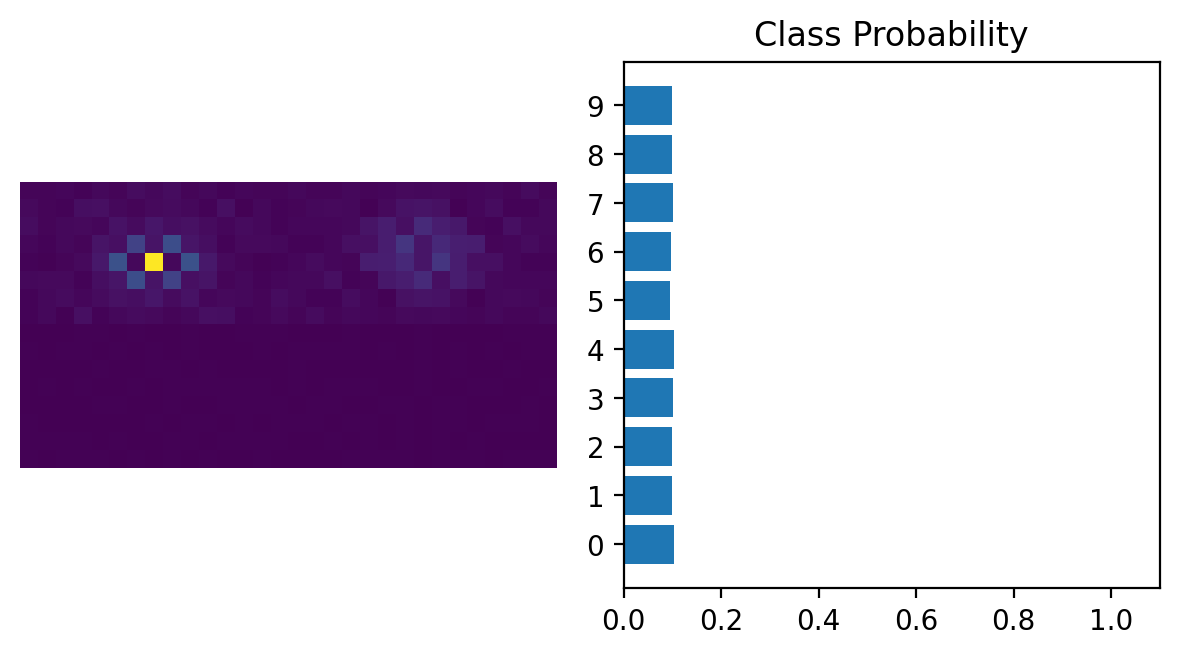

In [68]:
batch_x, batch_y = x_test, y_test
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(np.array(batch_y))
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# img = images[0].view(1, 784)
img = batch_x_tensor[0].view(1,480)
label = batch_y[0]
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Actual label =", label)
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 16, 30), ps)

In [58]:
batch_x, batch_y = x_train, y_train
batch_x_tensor = torch.from_numpy(batch_x)
batch_x_tensor = batch_x_tensor.to(torch.float32)

batch_y_tensor = torch.from_numpy(np.array(batch_y))
batch_y_tensor = batch_y_tensor.type(torch.LongTensor)

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(batch_x_tensor)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy())

In [59]:
probability_arr = []
for i in range(len(probab)):
    temp_arr = list(probab[i])
    probability_arr.append(temp_arr.index(max(temp_arr)))
# probab.index(max(probab))

In [60]:
probability_arr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [61]:
len(probability_arr)

1000

In [62]:
batch_y_tensor

tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [63]:
len(batch_y_tensor)

1000

In [64]:
acc = sum(1 for x,y in zip(probability_arr,batch_y_tensor) if x == y) / len(probability_arr)
print("Accuracy = ", acc*100,"%")

Accuracy =  10.0 %


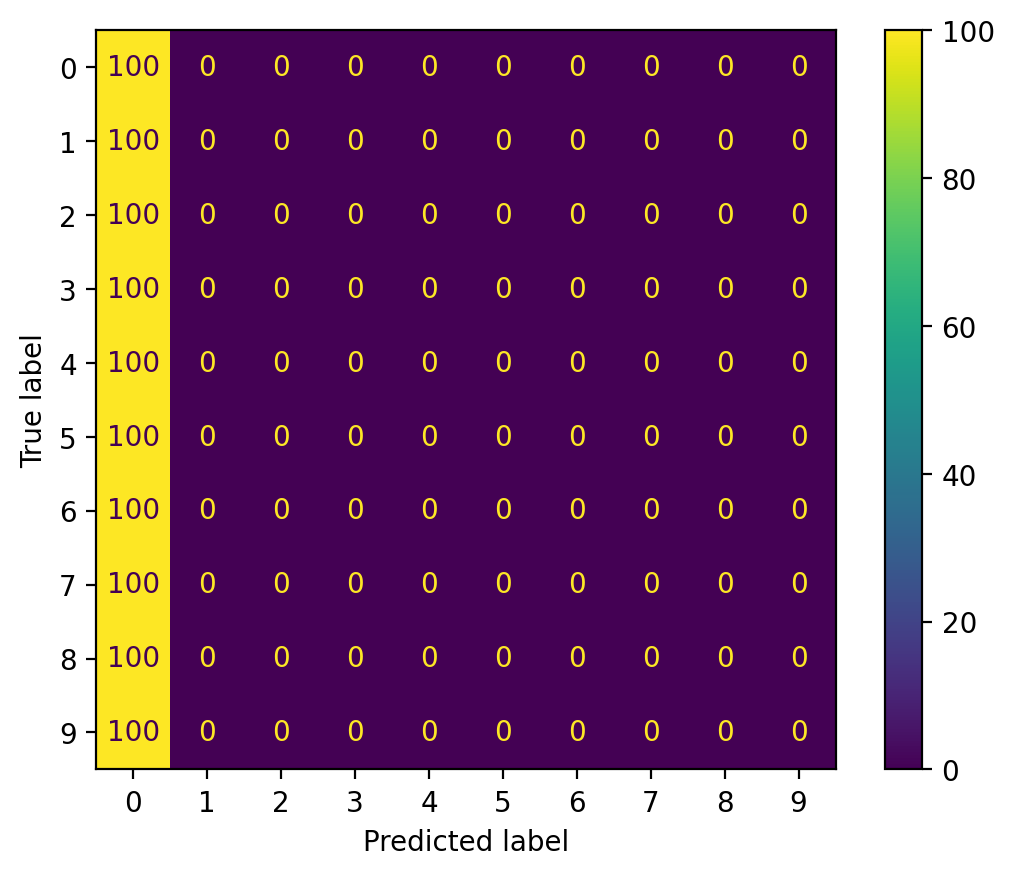

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = batch_y_tensor
y_pred = probability_arr

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()